## PART A

<a name = Section1></a>
#### **1. Importing Libraries**

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
import os
import copy
import pickle
import math
import time
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a name = Section1></a>
#### **2. Data Acquisition and Description**

Lets analyze the dataset and identify what attributes require generalization/categorization before we perform BUC on them.

In [2]:
data = pd.read_excel(f'./data/master.xlsx') # Load the Excel dataset
print('Shape of the dataset:', data.shape)
data.head(3) 

Shape of the dataset: (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X


- We have 27820 records and 12 attributes.
- In our records, we have variety of data including nominal data, binomial data, numerical data.

In [3]:
data.info() # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


Checking for:
1. duplicate values in rows - delete duplicate rows
2. missing values in column

In [4]:
duplicate = data[data.duplicated()] # Selecting duplicate rows except first occurrence based on all columns
duplicate

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


- It means there are no duplicate records

In [5]:
print(data.isnull().sum())  # Check for missing values

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


- As we can observe HDI has got 19,456 null values, out of total 27,820 entries. Given, more than half of the entries having NULL values, let's discount this column.

In [6]:
data.drop(['HDI for year'], axis=1, inplace=True)   # Remove the mentioned column

In [7]:
data.columns # remaining columns in our dataframe

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

<a name = Section2></a>
#### **3. Data Analysis and AOI**

Now, let's one by one, analyze the 11 dimensions and determine for which dimensions, we need to perform Attribute Oriented Induction (AOI) for generalization/categorization.

Data generalization summarizes data by replacing relatively low-level values with higher-level concepts, or by reducing the number of dimensions to summarize data in concept space involving fewer dimensions.

In [8]:
print("Unique values in coloumn country:\n", data["country"].unique())
print("---------------------------------------------------------")
print("Number of unique values:", data["country"].nunique())

Unique values in coloumn country:
 ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singap

- We will use the values of 'country' dimension as it is, because it is already in the highest-level of concept hierarchy.

In [9]:
print("Unique values in coloumn year:\n", data["year"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["year"].nunique())

Unique values in coloumn year:
 [1987 1988 1989 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 1985 1986 1990 1991 2012 2013
 2014 2015 2011 2016]
--------------------------------------------
Number of unique values: 32


- We will use the values of 'year' dimension as it has 32 distinct values.

In [10]:
print("Unique values in coloumn sex:\n", data["sex"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["sex"].nunique())

Unique values in coloumn sex:
 ['male' 'female']
--------------------------------------------
Number of unique values: 2


- We will use the values of 'sex' attribute/dimension as it is because it is already generalized, having two distinct values of the dimension.

In [11]:
print("Unique values in coloumn age:\n", data["age"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["age"].nunique())

Unique values in coloumn age:
 ['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
--------------------------------------------
Number of unique values: 6


- We will use the values of 'age' dimension as it is because it is already characterized by six distinct values of the dimension.

In [12]:
print("Unique values in coloumn suicide_no:\n", data["suicides_no"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["suicides_no"].nunique())

Unique values in coloumn suicide_no:
 [  21   16   14 ... 5503 4359 2872]
--------------------------------------------
Number of unique values: 2084


In [13]:
data["suicides_no"].describe()    # describe the values of the suicides_no attribute.

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

In [14]:
data["suicides_no"].value_counts()

suicides_no
0       4281
1       1539
2       1102
3        867
4        696
        ... 
2158       1
525        1
2297       1
5241       1
2872       1
Name: count, Length: 2084, dtype: int64

- We can derive from the describe() that, the minimum number of suicides are 0. The maximum number of suicide value is 22338.
At 25th percentile, the suicide value is 3. This means that 25 percent of data that lies below this 25th percentile point will have value equal to or less than 3.
- At 50th percentile, the suicide value is 25. This means half of the data points below 50th percentile point will have value equal to or less than 25. For the high-level description purpose, we can label all those values as `low_suicide_range`.
- At 75th percentile, the suicide value is 131. This means that 75% of the data points that lies below this 75th percentile point will have value equal to or less than 131. For the high-level description purpose, we can label all those values above `low_suicide_range` and below the value at 75th percentile as `medium_suicide_range`.
- Similarly, the maximum suicide number reported is 22338. All values that lie between 75th percentile value to the maximum reported value can be termed as `high_suicide_range`.

In [15]:
# Define the labels and conditions
conditions = [
    (data['suicides_no'] <= data['suicides_no'].quantile(0.5)),
    (data['suicides_no'] > data['suicides_no'].quantile(0.5)) & (data['suicides_no'] <= data['suicides_no'].quantile(0.75)),
    (data['suicides_no'] > data['suicides_no'].quantile(0.75))
]

labels = ['low_suicides_range', 'medium_suicides_range', 'high_suicides_range']

# Create a new column with the labels
data['suicides_range'] = np.select(conditions, labels, default='unknown')
data.drop(['suicides_no'], axis=1, inplace=True)   # Remove the column 'suicides_no' because we are using 'suicides_range' in place of that.
# Display the first few rows of the DataFrame with the new column
data.head(2)

,country,year,sex,age,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_range
0,Albania,1987,male,15-24 years,312900,6.71,Albania1987,2156624900,796,Generation X,low_suicides_range
1,Albania,1987,male,35-54 years,308000,5.19,Albania1987,2156624900,796,Silent,low_suicides_range


In [16]:
print("Unique values in column population:\n", data["population"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["population"].nunique())

Unique values in column population:
 [ 312900  308000  289700 ... 2762158 2631600 1438935]
--------------------------------------------
Number of unique values: 25564


- "population" can't be used directly. Need to perform AOI to create higher-level descriptions or categories for numerical data.

In [17]:
data["population"].describe().apply(lambda x: format(x, 'f')) # Suppress Scientific Notation

count       27820.000000
mean      1844793.617398
std       3911779.441756
min           278.000000
25%         97498.500000
50%        430150.000000
75%       1486143.250000
max      43805214.000000
Name: population, dtype: object

In [18]:
data["population"].value_counts()

population
24000      20
26900      13
20700      12
22000      12
4900       11
           ..
3282478     1
3953119     1
5745824     1
8448839     1
1438935     1
Name: count, Length: 25564, dtype: int64

- We can derive from the describe() that, the minimum reported population is 278. The maximum reported population is 43805214.
- At 25th percentile, the reported population value is 97498.5. This means that 25 percent of data that lies below this 25th percentile point will have value equal to or less than 97498.
- At 50th percentile, the population value is 430150. This means half of the data points below 50th percentile point will have value equal to or less than 430150.
- At 75th percentile, the population value is 1486143.25. This means that 75% of the data points that lies below this 75th percentile point will have value equal to or less than 1486143.
- For the high-level description purpose:
    - we can label all those values that lie between 0 and 25th percentile value as `low_population_range`.
    - all the values that lie between 25th percentile value and 75th percentile value as `medium_population_range`.
    - all values that lie between 75th percentile value to the maximum reported value can be termed as `high_population_range`.

In [19]:
# Define the labels and conditions
conditions = [
    (data['population'] <= data['population'].quantile(0.25)),
    (data['population'] > data['population'].quantile(0.25)) & (data['population'] <= data['population'].quantile(0.75)),
    (data['population'] > data['population'].quantile(0.75))
]

labels = ['low_population_range', 'medium_population_range', 'high_population_range']

# Create a new column with the labels
data['population_range'] = np.select(conditions, labels, default='unknown')
data.drop(['population'], axis=1, inplace=True)   # Remove the column 'population' because we are using 'population_range' in place of that.
# Display the first few rows of the DataFrame with the new column
data.head(2)

,country,year,sex,age,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,suicides_range,population_range
0,Albania,1987,male,15-24 years,6.71,Albania1987,2156624900,796,Generation X,low_suicides_range,medium_population_range
1,Albania,1987,male,35-54 years,5.19,Albania1987,2156624900,796,Silent,low_suicides_range,medium_population_range


In [20]:
print(data["suicides/100k pop"].value_counts())

suicides/100k pop
0.00     4281
0.29       72
0.32       69
0.34       55
0.37       52
         ... 
46.73       1
41.47       1
61.03       1
28.25       1
26.61       1
Name: count, Length: 5298, dtype: int64


In [21]:
print("Unique values in the column \"suicides/100k pop\":\n", data["suicides/100k pop"].unique())
print("Number of unique values:", data["suicides/100k pop"].nunique())
print("--------------------------------------------")
print("Unique values in the column \"country-year\":\n", data["country-year"].unique())
print("Number of unique values:", data["country-year"].nunique())
print("--------------------------------------------")

Unique values in the column "suicides/100k pop":
 [ 6.71  5.19  4.83 ... 47.86 40.75 26.61]
Number of unique values: 5298
--------------------------------------------
Unique values in the column "country-year":
 ['Albania1987' 'Albania1988' 'Albania1989' ... 'Uzbekistan2012'
 'Uzbekistan2013' 'Uzbekistan2014']
Number of unique values: 2321
--------------------------------------------


- As we are already using 'population' and 'suicides_no' attributes in their generalized form, we can remove the dimension "suicides/100k pop" from our dataset.
- Similarly, we are using distinct values in 'country' and 'year' dimension, therefore, we will drop the dimension 'country-year'.

In [22]:
data.drop(['suicides/100k pop'], axis=1, inplace=True)   # Remove the mentioned column
data.drop(['country-year'], axis=1, inplace=True)   # Remove the mentioned column
data.drop(['gdp_per_capita ($)'], axis=1, inplace=True)

In [23]:
data[" gdp_for_year ($) "].describe().apply(lambda x: format(x, 'f')) # Suppress Scientific Notation

count             27820.000000
mean       445580969025.726624
std       1453609985940.912109
min            46919625.000000
25%          8985352832.000000
50%         48114688201.000000
75%        260202429150.000000
max      18120714000000.000000
Name:  gdp_for_year ($) , dtype: object

- We can derive from the describe() that, the minimum reported gdp_per_year value is 46,919,625\\$. The maximum reported population is 18,120,714,000,000\\$.
- At 25th percentile, the reported gdp_per_year value is 8,985,352,832\\$. This means that 25 percent of data that lies below this 25th percentile point will have value equal to or less than 8,985,352,832\\$.
- At 50th percentile, the gdp_per_year value is 48,114,688,201\\$. This means half of the data points below 50th percentile point will have value equal to or less than 48,114,688,201\\$.
- At 75th percentile, the gdp_per_year value is 260,202,429,150\\$. This means that 75\% of the data points that lies below this 75th percentile point will have value equal to or less than 260,202,429,150\\$. 
- For the high-level description purpose:
    - we can label all those values that lie between 0 and 25th percentile value as `low_income_range`.
    - all the values that lie between 25th percentile value and 75th percentile value as `medium_income_range`.
    - all values that lie between 75th percentile value to the maximum reported value can be termed as `high_income_range`.

In [24]:
# Define the labels and conditions
conditions = [
    (data[' gdp_for_year ($) '] <= data[' gdp_for_year ($) '].quantile(0.25)),
    (data[' gdp_for_year ($) '] > data[' gdp_for_year ($) '].quantile(0.25)) & (data[' gdp_for_year ($) '] <= data[' gdp_for_year ($) '].quantile(0.75)),
    (data[' gdp_for_year ($) '] > data[' gdp_for_year ($) '].quantile(0.75))
]

labels = ['low_income_range', 'medium_income_range', 'high_income_range']

# Create a new column with the labels
data['gdp_per_year_income_range'] = np.select(conditions, labels, default='unknown')
data.drop([' gdp_for_year ($) '], axis=1, inplace=True)   # Remove the column 'gdp+per_year ($)' because we are using 'gdp_per_year_income_range' in place of that.
# Display the first few rows of the DataFrame with the new column
data.head(2)

,country,year,sex,age,generation,suicides_range,population_range,gdp_per_year_income_range
0,Albania,1987,male,15-24 years,Generation X,low_suicides_range,medium_population_range,low_income_range
1,Albania,1987,male,35-54 years,Silent,low_suicides_range,medium_population_range,low_income_range


In [25]:
print(data["generation"].value_counts())

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64


In [26]:
print("Unique values:\n", data["generation"].unique())
print("--------------------------------------------")
print("Number of unique values:", data["generation"].nunique())

Unique values:
 ['Generation X' 'Silent' 'G.I. Generation' 'Boomers' 'Millenials'
 'Generation Z']
--------------------------------------------
Number of unique values: 6


In [27]:
print(data.info)

<bound method DataFrame.info of           country  year     sex          age       generation  \
0         Albania  1987    male  15-24 years     Generation X   
1         Albania  1987    male  35-54 years           Silent   
2         Albania  1987  female  15-24 years     Generation X   
3         Albania  1987    male    75+ years  G.I. Generation   
4         Albania  1987    male  25-34 years          Boomers   
...           ...   ...     ...          ...              ...   
27815  Uzbekistan  2014  female  35-54 years     Generation X   
27816  Uzbekistan  2014  female    75+ years           Silent   
27817  Uzbekistan  2014    male   5-14 years     Generation Z   
27818  Uzbekistan  2014  female   5-14 years     Generation Z   
27819  Uzbekistan  2014  female  55-74 years          Boomers   

              suicides_range         population_range  \
0         low_suicides_range  medium_population_range   
1         low_suicides_range  medium_population_range   
2         low_su

In [28]:
#Delete unnecessary variabels after Preprocessing stesps
del conditions, duplicate, labels

<a name = Section4></a>
#### **4. BUC Implementation**

- The cell below contains a function to encode categorical attributes to numerical.

In [29]:
class preprocess_df:
  '''
  Class to preprocess DataFrame
  '''
  def encode_attributes(self, input_df, column_indices):
    transformed_dicts_ls = []
    transformed_df = input_df.copy(deep = True)
    column_names = transformed_df.columns.tolist()
    for col_iter in column_indices:
      temp_dict = {}
      temp_key = 0
      temp_ls = []
      column_name = column_names[col_iter]
      for col in transformed_df.iloc[:,col_iter].tolist():
        if col not in [*temp_dict.keys()]:
          temp_dict[col] = temp_key
          temp_key += 1
        temp_ls.append(temp_dict[col])
      dict_inv = {v:k for k,v in temp_dict.items()}
      transformed_dicts_ls.append(dict_inv)
      transformed_df[column_name] = temp_ls
    return transformed_df, transformed_dicts_ls

#### When the entire dataframe fits into the main memory
- Below cell contains the class for BUC implementation when the dataframe fits into the main memory.
- Most of the variable names are exactly as indicated in the paper.
- Counting sort is used as prescribed in the paper.

In [30]:
class buc:
    '''
    Class for implementing BUC
    '''
    def __init__(self, df, column_enc_dicts_ls, minsup):
        self.numDims = df.shape[1]
        self.cardinality = []
        self.minsup = minsup
        self.output_df = None
        self.datacounts = [[]] * df.shape[1]
        self.attribute_ls = ["*"] * df.shape[1]
        self.debug_counter = 0
        self.output_dict = {}
        self.column_enc_dicts_ls = column_enc_dicts_ls

    def counting_sort(self, array_a, df_idx_ls):
      '''
      Inputs 
      array_a: List to be sorted
      df_idx_ls: Index list corresponding to the array_a. For example: DataFrame indices corresponding to array_a.
      Output
      idx_ls: Order in which df_idx_ls should be arranged so that array_a is in the sorted order i.e argsorting array_a
      '''
      array_c = [0]*(max(array_a) + 1)
      idx_ls = [-1] * (len(array_a))

      for i in range(0, len(array_a)):
        array_c[array_a[i]] += 1

      for i in range(0, len(array_c) - 1):
        array_c[i+1] = array_c[i] + array_c[i+1]

      for i in range(len(array_a) - 1, -1, -1):
        array_c[array_a[i]] = array_c[array_a[i]] - 1
        idx = array_c[array_a[i]]
        idx_ls[idx] = df_idx_ls[i]

      return idx_ls


    def partition(self, input_df, d):
        '''
        Implements partitioning logic i.e sorts the input dataframe and populates self.datacounts
        Inputs:
        input_df: Input DataFrame
        d: column number based on which sorting is performed
        Output:
        input_df: DataFrame which is sorted according to the specified column
        '''
        #Sorting the dataframe
        temp_counter_dict = {}
        sorted_idx = self.counting_sort(input_df.iloc[:,d].tolist(), input_df.index.tolist())
        input_df = input_df.reindex(sorted_idx)
        #Populating self.datacounts
        for attribute in input_df.iloc[:,d].tolist():
            temp_counter_dict[attribute] = temp_counter_dict.get(attribute, 0) + 1
        self.datacounts[d] = [*temp_counter_dict.values()]
        return input_df

    def buc_implementation(self, input, dim):
        '''
        Function to implement BUC as indicated in the original paper. 
        Populates self.output_dict which is the output dictionary.
        NOTE:Most of the variable names are exactly as indicated in the original paper.
        Input
        input: Input DataFrame
        dim: Starting column for performing aggregation
        '''
        self.debug_counter += 1
        if tuple(self.attribute_ls) in [*self.output_dict.keys()]:
          print(f"Error!!")
        self.output_dict[tuple(self.attribute_ls)] = input.shape[0]
       
        for d in range(dim, self.numDims,1):
            bigc = input.iloc[:,d].nunique()
            input = self.partition(input, d)
            k = 0
            for i in range(0, bigc, 1):
                smallc = self.datacounts[d][i]
                if smallc >= self.minsup:
                    self.attribute_ls[d] = self.column_enc_dicts_ls[d][input.iloc[k,d]]
                    self.buc_implementation(input.iloc[k:k+smallc,:], dim=d+1)
                k += smallc
            self.attribute_ls[d] = "*"

In [31]:
def format_output(output_dict):
    '''
    Function that takes the output dictionary and converts it into a dataframe for readability
    '''
    output_dict_transformed = {}
    columns_ls = input_df.columns.tolist()
    for column in columns_ls:
        output_dict_transformed[column] = []
        output_dict_transformed['count'] = []
    for tuple_key, value in output_dict.items():
        output_dict_transformed['count'].append(value)
        for tuple_key_iter in range(0,len(tuple_key)):
            output_dict_transformed[columns_ls[tuple_key_iter]].append(tuple_key[tuple_key_iter])
    output_df = pd.DataFrame.from_dict(output_dict_transformed)
    columns_order = ['country', 'year', 'sex', 'age', 'generation', 'suicides_range', 'population_range', 'gdp_per_year_income_range', 'count']
    output_df = output_df.reindex(columns = columns_order)
    return output_df

- BUC Output when the entire dataframe fits into the main memory.

In [32]:
#BUC Implementation: When the entire dataframe fits into the main memory.
minsup = 100
num_splits = 10
input_df = data
#Encode all of the categorical attributes into numerical form.
preprocess_obj = preprocess_df()
transformed_df, column_enc_dicts_ls = preprocess_obj.encode_attributes(input_df, [*range(0,input_df.shape[1])]) #NOTE: This should be modified as required
buc_obj = buc(transformed_df, column_enc_dicts_ls, minsup)
buc_obj.buc_implementation(transformed_df, 0)
output_dict = buc_obj.output_dict
format_output(output_dict)

,country,year,sex,age,generation,suicides_range,population_range,gdp_per_year_income_range,count
0,*,*,*,*,*,*,*,*,27820
1,Albania,*,*,*,*,*,*,*,264
2,Albania,*,male,*,*,*,*,*,132
3,Albania,*,male,*,*,low_suicides_range,*,*,119
4,Albania,*,male,*,*,*,medium_population_range,*,110
...,...,...,...,...,...,...,...,...,...
6602,*,*,*,*,*,*,high_population_range,medium_income_range,2219
6603,*,*,*,*,*,*,high_population_range,high_income_range,4727
6604,*,*,*,*,*,*,*,low_income_range,6958
6605,*,*,*,*,*,*,*,medium_income_range,13910


In [33]:
del minsup, num_splits, input_df, preprocess_obj, transformed_df, column_enc_dicts_ls, buc_obj, output_dict

#### When the entire dataframe doesn't fit into the main memory
- The dataframe is partitioned into a certain number of chunks which are saved on the disk.
- External merge sort is implemented for partitioning.
- For external merge sort, we perform a k-way merge after sorting each individual list (assuming that we are given k lists).

In [34]:
def external_merge_sort_implementation(chunk_paths, d, iteration_num, index_dict, file_path):
    '''
    Implements external merge sort i.e to sort k dataframes when all of them don't fit in the main memory.
    Given K chunks, the function replaces the unsorted chunks with their globally sorted versions.
    Inputs:
    chunk_paths: Locations of each chunk
    d: Column number on which sorting is to be performed
    iteration_num: Iteration number
    index_dict: Dictionary containing the indices in each chunked dataframe.
    Output:
    None
    '''
    sorted_chunk_paths = []
    index_ls = copy.deepcopy([*index_dict.values()])
    output_len_ls = copy.deepcopy([*index_dict.values()])
    index_ls = [len(i) for i in index_ls]
    output_len_ls = [len(i) for i in output_len_ls]
    output_len_idx = 0
    #Sorting each individual dataframe
    for i_iter, chunk_path in enumerate(chunk_paths):
        chunk_df = pd.read_pickle(chunk_path)
        if i_iter == 0:
            df_columns = chunk_df.columns
        chunk_df_ls = chunk_df.values.tolist()
        chunk_df_ls.sort(key = lambda x: (x[d]))
        sorted_chunk_path = f"./sorted_{chunk_path.split('/')[-1].split('.pkl')[0]}"
        sorted_chunk_df = pd.DataFrame(chunk_df_ls, columns=df_columns)
        sorted_chunk_df.to_pickle(sorted_chunk_path)
        sorted_chunk_paths.append(sorted_chunk_path)

    #Merging the sorted chunks by performing a K-way merge operation
    output_ls = []
    idxs_ls = [0] * len(chunk_paths)
    input_ls = []
    min_idx = -1
    debug_counter = 0
    sorted_chunks_path_cpy = copy.deepcopy(sorted_chunk_paths)
    while True:
        #First iteration
        if min_idx == -1:
            for sorted_chunk_path in sorted_chunks_path_cpy:
                df = pd.read_pickle(sorted_chunk_path)
                input_ls.append(df.values.tolist()[idxs_ls[i_iter]])
        else:
            try:
                df = pd.read_pickle(sorted_chunks_path_cpy[min_idx])
                input_ls.insert(min_idx, df.values.tolist()[idxs_ls[min_idx]])
            except Exception as err:
                print(f"Inside except block... {err}")
  
        input_arr = np.array(input_ls)
        min_idx = np.argmin(input_arr, axis=0)[d]
        output_ls.append(input_ls[min_idx])
        input_ls.pop(min_idx)
        idxs_ls[min_idx] += 1

        #Writing output
        if len(output_ls) >= output_len_ls[output_len_idx]:
            sorted_chunk_df = pd.DataFrame(output_ls, columns=df_columns)
            sorted_chunk_df.to_pickle(f"{file_path}{iteration_num}{output_len_idx}.pkl")
            output_ls = []
            output_len_idx += 1
        
        if idxs_ls[min_idx] > (index_ls[min_idx] -1):
            idxs_ls.pop(min_idx)
            sorted_chunks_path_cpy.pop(min_idx)
            index_ls.pop(min_idx)
            if len(input_ls) == 0:
                break 
            try:
                if min_idx > len(input_ls) - 1:
                    min_idx -= 1
                    input_ls.pop(min_idx)
                else:
                    input_ls.pop(min_idx)
            except Exception as err:
                print(f"{err}")
                
    #Remove sorted_chunk_paths
    for sorted_chunk in sorted_chunk_paths:
        os.remove(sorted_chunk)

- Below cell contains the code for implementing the BUC class when the entire dataframe doesn't fit into the main memory.

In [35]:
#BUC implementation
class buc_external:
    '''
    Class for implementing BUC
    '''
    def __init__(self, df, column_enc_dicts_ls, minsup):
        self.numDims = df.shape[1]
        self.cardinality = []
        self.minsup = minsup
        self.output_df = None
        self.datacounts = [[]] * df.shape[1]
        self.attribute_ls = ["*"] * df.shape[1]
        self.debug_counter = 0
        self.output_dict = {}
        self.column_enc_dicts_ls = column_enc_dicts_ls
        self.file_path = './dfs/iter_run_'
        os.makedirs(f"./dfs", exist_ok=True)

    def counting_sort(self, array_a, df_idx_ls):
      '''
      Inputs 
      array_a: List to be sorted
      df_idx_ls: Index list corresponding to the array_a. For example: DataFrame indices corresponding to array_a.
      Output
      idx_ls: Order in which df_idx_ls should be arranged so that array_a is in the sorted order.
      '''
      array_c = [0]*(max(array_a) + 1)
      idx_ls = [-1] * (len(array_a))

      for i in range(0, len(array_a)):
        array_c[array_a[i]] += 1

      for i in range(0, len(array_c) - 1):
        array_c[i+1] = array_c[i] + array_c[i+1]

      for i in range(len(array_a) - 1, -1, -1):
        array_c[array_a[i]] = array_c[array_a[i]] - 1
        idx = array_c[array_a[i]]
        idx_ls[idx] = df_idx_ls[i]

      return idx_ls

    def partition(self, iteration_num, num_splits, index_dict, d):
        '''
        Function to perform partitioning, external merge sort is used here.
        Inputs:
        iteration_num: Iteration number.
        num_splits: No. of chunks into which the input file is divided.
        index_dict: Dictionary containing the indices in each chunked dataframe.
        d: Attribute on which sorting is to be performed.
        '''
        chunk_paths_ls = []
        for i_iter in range(0, num_splits):
            if os.path.exists(f"{self.file_path}{iteration_num}{i_iter}.pkl"):
                chunk_paths_ls.append(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                
        external_merge_sort_implementation(chunk_paths_ls, d, iteration_num, index_dict, self.file_path)
        
        input_df = pd.DataFrame()
        for i_iter in range(0, num_splits):
            if os.path.exists(f"{self.file_path}{iteration_num}{i_iter}.pkl"):
                df = pd.read_pickle(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                input_df = pd.concat([input_df, df])
        
        #Populating self.datacounts
        temp_counter_dict = {}
        for attribute in input_df.iloc[:,d].tolist():
            temp_counter_dict[attribute] = temp_counter_dict.get(attribute, 0) + 1
        self.datacounts[d] = [*temp_counter_dict.values()]
        return None
                    
        
    def compute_aggregate(self, iteration_num, num_splits):
        '''
        Function to find the count i.e the total number of rows in all the chunks combined.
        '''
        count = 0
        for i_iter in range(0,num_splits):
            if os.path.exists(f"{self.file_path}{iteration_num}{i_iter}.pkl"):
                df = pd.read_pickle(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                count += df.shape[0]
        return count

    
    def find_bigc(self, iteration_num, num_splits, d): 
        '''
        Bigc refers to the cardinality of the dth attribute in the dataframe
        '''
        computed_values = []
        bigc = 0
        for i_iter in range(0, num_splits):
            if os.path.exists(f"{self.file_path}{iteration_num}{i_iter}.pkl"):
                df = pd.read_pickle(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                for attribute_name in df.iloc[:,d].unique().tolist():
                    if attribute_name not in computed_values:
                        computed_values.append(attribute_name)
                        bigc += 1
        return bigc

    def split_input(self, slice_range, iteration_num, num_splits):
        '''
        Function to split the input dataframe into a specified number of chunks. 
        Chunks in iteration 't' are obtained by taking the correct indices from iteration 't-1'
        '''
        #Delete previous files of current iteration
        for i_iter in range(0, num_splits):
            if os.path.exists(f"{self.file_path}{iteration_num}{i_iter}.pkl"):
                os.remove(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                            
        index_dict_t = {} #Stores the indices that are present in each dictionary
        #Indicates the very first iteration
        if not os.path.exists(f"{self.file_path}{iteration_num-1}0.pkl"):
            input_df = transformed_df
            split_df = np.array_split(input_df, num_splits)
            start_idx = 0
            for i_iter, df in enumerate(split_df):
                # print(f"DF after splitting: {df}")
                df.to_pickle(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                index_dict_t[i_iter] = [*range(start_idx, start_idx + df.shape[0])]
                start_idx += df.shape[0]   
            with open(f"{self.file_path}_dict_{iteration_num}.pkl", "wb") as fp:
                pickle.dump(index_dict_t, fp)
        else:  
            if (slice_range[1] - slice_range[0]) < num_splits:
                df_lengths_t = [slice_range[1] - slice_range[0]]
                df_lengths_t.extend([0]*(num_splits-1))
            else:
                df_lengths_t = [math.floor((slice_range[1] - slice_range[0])/num_splits)]*num_splits
                df_lengths_t[-1] += (slice_range[1] - slice_range[0])%num_splits
            df_ranges_t_ls = []
            start_idx = slice_range[0]
            for df_length in df_lengths_t:
                if df_length != 0:
                    df_ranges_t_ls.append([*range(start_idx,start_idx + df_length)])
                    start_idx += df_length
            del start_idx 
            
            with open(f"{self.file_path}_dict_{iteration_num-1}.pkl", "rb") as fp:
                index_dict_tminus = pickle.load(fp)

            start_dict_idx = 0
            index_dict_t = {}
            for i_iter, df_range_t in enumerate(df_ranges_t_ls):
                start_df_idx = 0
                df = pd.DataFrame()
                for df_tminus_name, df_tminus_range in index_dict_tminus.items():
                    common_elements = [i for i in df_range_t for j in df_tminus_range if i == j]
                    common_elements = [i-start_df_idx for i in common_elements]
                    if len(common_elements) > 0:
                        temp_df = pd.read_pickle(f"{self.file_path}{iteration_num-1}{df_tminus_name}.pkl")
                        df = pd.concat([df, temp_df.iloc[common_elements,:]])
                    start_df_idx += len(df_tminus_range)
                #Writing output pickle files
                df.to_pickle(f"{self.file_path}{iteration_num}{i_iter}.pkl")
                index_dict_t[i_iter] = [*range(start_dict_idx, start_dict_idx + df.shape[0])]
                start_dict_idx += df.shape[0]
                #Writing the output dictionary
                with open(f"{self.file_path}_dict_{iteration_num}.pkl", "wb") as fp:
                    pickle.dump(index_dict_t, fp)
        return index_dict_t

    def populate_attribute_ls(self, k, d, iteration_num):
        '''
        Function to populate items in the output dictionary
        '''
        with open(f"{self.file_path}_dict_{iteration_num}.pkl", "rb") as fp:
            index_dict_t = pickle.load(fp)

        k_idx = k
        for df_name, df_idxs in index_dict_t.items():
            if k in df_idxs:
                df = pd.read_pickle(f"{self.file_path}{iteration_num}{df_name}.pkl")
                self.attribute_ls[d] = self.column_enc_dicts_ls[d][df.iloc[k_idx,d]]
                return None
            k_idx -= len(df_idxs)
        
        
    
    def buc_implementation(self, slice_range, dim, iteration_num, num_splits):
        '''
        Function to implement BUC when it is assumed that the dataframe doesn't fit in the main memory. 
        Populates self.output_dict which is the output dictionary.
        Inputs
        slice_range: Rows of the dataframe which have to sliced at iteration 't'.
        dim: Starting column for performing aggregation.
        iteration_num: Iteration number.
        num_splits: No.of chunks into which the input dataframe is to be divided.
        '''
        self.debug_counter += 1
        #Split the input into chunks, chunks at iteration 't' are computed from chunks at iteration 't-1'
        index_dict = self.split_input(slice_range, iteration_num, num_splits)
        #Compute count
        aggregate = self.compute_aggregate(iteration_num, num_splits)
        self.output_dict[tuple(self.attribute_ls)] = aggregate
        
        for d in range(dim, self.numDims,1):
            bigc = self.find_bigc(iteration_num, num_splits, d)
            #External partitioning: Calls merge sort
            self.partition(iteration_num, num_splits, index_dict, d)
            k = 0
            for i in range(0, bigc, 1):
                smallc = self.datacounts[d][i]
                if smallc >= self.minsup:
                    self.populate_attribute_ls(k, d, iteration_num)
                    self.buc_implementation(slice_range = [k,k+smallc], dim=d+1, iteration_num=iteration_num+1, num_splits=num_splits)
                k += smallc
            self.attribute_ls[d] = "*"

In [36]:
minsup = 100
input_df = data
num_splits = 20
preprocess_obj = preprocess_df()
transformed_df, column_enc_dicts_ls = preprocess_obj.encode_attributes(input_df, [*range(0,input_df.shape[1])]) #NOTE: This should be modified as required
buc_obj = buc_external(transformed_df, column_enc_dicts_ls, minsup)
buc_obj.buc_implementation([0,transformed_df.shape[0]], 0, 0, num_splits)
output_dict = buc_obj.output_dict
format_output(output_dict)

,country,year,sex,age,generation,suicides_range,population_range,gdp_per_year_income_range,count
0,*,*,*,*,*,*,*,*,27820
1,Albania,*,*,*,*,*,*,*,264
2,Albania,*,male,*,*,*,*,*,132
3,Albania,*,male,*,*,low_suicides_range,*,*,119
4,Albania,*,male,*,*,*,medium_population_range,*,110
...,...,...,...,...,...,...,...,...,...
6602,*,*,*,*,*,*,high_population_range,medium_income_range,2219
6603,*,*,*,*,*,*,high_population_range,high_income_range,4727
6604,*,*,*,*,*,*,*,low_income_range,6958
6605,*,*,*,*,*,*,*,medium_income_range,13910


#### a) A plot of minsup vs. runtime, keeping allotted memory fixed.

- Here it is assumed that the dataframe fits into the main memory.
- The value of minsup is varied between 90 and 200 in steps of 10.

In [37]:
num_splits = 10
input_df = data
#Encode all of the categorical attributes into numerical form.
preprocess_obj = preprocess_df()
transformed_df, column_enc_dicts_ls = preprocess_obj.encode_attributes(input_df, [*range(0,input_df.shape[1])]) #NOTE: This should be modified as required
minsup_ls = []
time_taken_ls = []
for minsup in range(90, 200, 10):
    minsup_ls.append(minsup)
    start_time = time.time()
    buc_obj = buc(transformed_df, column_enc_dicts_ls, minsup)
    buc_obj.buc_implementation(transformed_df, 0)
    time_taken_ls.append(time.time() - start_time)
del minsup, num_splits, input_df, preprocess_obj, transformed_df, column_enc_dicts_ls

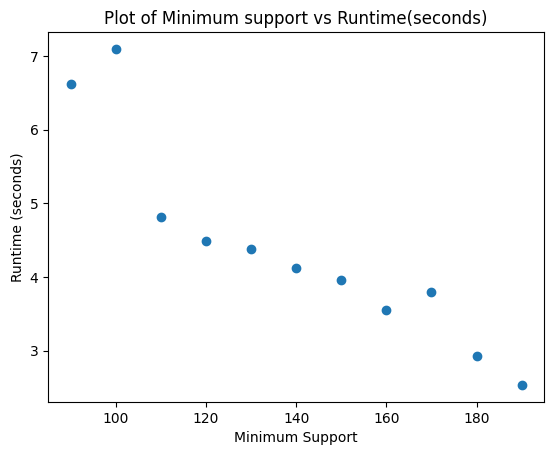

In [38]:
plt.scatter(minsup_ls, time_taken_ls)
plt.xlabel(f"Minimum Support")
plt.ylabel(f"Runtime (seconds)")
plt.title(f"Plot of Minimum support vs Runtime(seconds)")
del minsup_ls, time_taken_ls

#### b) A plot of allotted memory vs. runtime, keeping minsup fixed.

- The variation in the allocated main memory is indicated by varying the number of chunks into which the original dataframe is divided i.e greater the number of chunks lesser is the main memory that is allocated.
-  NOTE: The dataframe is restricted to 10K rows to speed up the execution.

In [39]:
minsup = 200
input_df = data.loc[0:10000,:]
preprocess_obj = preprocess_df()
transformed_df, column_enc_dicts_ls = preprocess_obj.encode_attributes(input_df, [*range(0,input_df.shape[1])]) #NOTE: This should be modified as required
chunks_ls = []
time_taken_ls = []
for num_splits in range(30,50,5):
    chunks_ls.append(num_splits)
    start_time = time.time()
    buc_obj = buc_external(transformed_df, column_enc_dicts_ls, minsup)
    buc_obj.buc_implementation([0,transformed_df.shape[0]], 0, 0, num_splits)
    time_taken_ls.append(time.time() - start_time)
    # print(f"{time_taken_ls = }")
del minsup, num_splits, input_df, preprocess_obj, transformed_df, column_enc_dicts_ls

Text(0.5, 1.0, 'Plot of Number of chunks(indication of main memory) vs Runtime (seconds)')

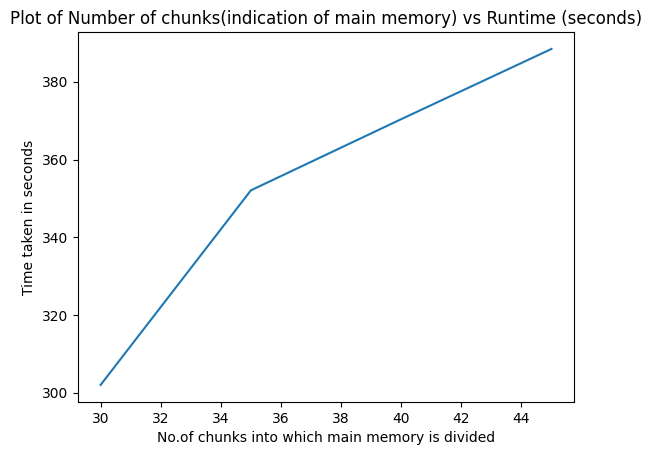

In [40]:
plt.plot(chunks_ls, time_taken_ls)
plt.xlabel(f"No.of chunks into which main memory is divided")
plt.ylabel(f"Time taken in seconds")
plt.title(f"Plot of Number of chunks(indication of main memory) vs Runtime (seconds)")

----

## PART B

<a name = Section1></a>
#### **1. Data Acquisition and Description**

Lets analyze the dataset and identify what attributes require generalization/categorization

In [41]:
property_data = pd.read_excel('./data/cleaned_data.xlsx')      # Load the Excel dataset
print('Shape of the dataset:', property_data.shape)
property_data.head(3)

Shape of the dataset: (143708, 32)


,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell


- We have 143,708 records and 32 attributes.
- In our records, we have variety of data including nominal data, binomial data, numerical data and textual data.

In [42]:
property_data.info() # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143708 entries, 0 to 143707
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Property_Name             143708 non-null  object 
 1   Property_id               143708 non-null  int64  
 2   Property_type             143708 non-null  object 
 3   Property_status           143708 non-null  object 
 4   Price_per_unit_area       143708 non-null  object 
 5   Posted_On                 143708 non-null  object 
 6   Project_URL               143708 non-null  object 
 7   builder_id                143708 non-null  int64  
 8   Builder_name              143708 non-null  object 
 9   Property_building_status  143708 non-null  object 
 10  City_id                   143708 non-null  int64  
 11  City_name                 143708 non-null  object 
 12  No_of_BHK                 143708 non-null  object 
 13  Locality_ID               143708 non-null  i

- Here we show the data type of our various attributes.

Always check for:
1. duplicate values in rows - delete duplicate rows
2. missing values in column

In [43]:
duplicate = property_data[property_data.duplicated()]     # Selecting duplicate rows except first occurrence based on all columns
duplicate

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category


In [44]:
print(property_data.isnull().sum())      # Check for missing values

Property_Name               0
Property_id                 0
Property_type               0
Property_status             0
Price_per_unit_area         0
Posted_On                   0
Project_URL                 0
builder_id                  0
Builder_name                0
Property_building_status    0
City_id                     0
City_name                   0
No_of_BHK                   0
Locality_ID                 0
Locality_Name               0
Longitude                   0
Latitude                    0
Price                       0
Size                        0
Sub_urban_ID                0
Sub_urban_name              0
description                 0
is_furnished                0
listing_domain_score        0
is_plot                     0
is_RERA_registered          0
is_Apartment                0
is_ready_to_move            0
is_commercial_Listing       0
is_PentaHouse               0
is_studio                   0
Listing_Category            0
dtype: int64


- We observe that there are no missing and duplicate values.

In [45]:
property_data.columns # columns in our dataframe

Index(['Property_Name', 'Property_id', 'Property_type', 'Property_status',
       'Price_per_unit_area', 'Posted_On', 'Project_URL', 'builder_id',
       'Builder_name', 'Property_building_status', 'City_id', 'City_name',
       'No_of_BHK', 'Locality_ID', 'Locality_Name', 'Longitude', 'Latitude',
       'Price', 'Size', 'Sub_urban_ID', 'Sub_urban_name', 'description',
       'is_furnished', 'listing_domain_score', 'is_plot', 'is_RERA_registered',
       'is_Apartment', 'is_ready_to_move', 'is_commercial_Listing',
       'is_PentaHouse', 'is_studio', 'Listing_Category'],
      dtype='object')

<a name = Section2></a>
#### **2. Data Analysis and AOI**

Now, let's one by one, analyze the 32 dimensions and determine for which dimension, we need to perform Attribute Oriented Induction (AOI) for generalization/categorization.

Data generalization summarizes data by replacing relatively low-level values with higher-level concepts, or by reducing the number of dimensions to summarize data in concept space involving fewer dimensions.

----

In [46]:
print("Unique values in coloumn 'Property_Name':\n", property_data["Property_Name"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_Name"].nunique())

Unique values in coloumn 'Property_Name':
 ['Arkiton Luxe' 'Keshav Akshar Ocean Pearl' 'Vishwa Opulence' ...
 'Harmony Apartments' 'Terraform Lotus' 'Antalica Tower']
.......................................................................
Number of unique values: 20509


In [47]:
print("Unique values in coloumn 'Property_id':\n", property_data["Property_id"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_id"].nunique())

Unique values in coloumn 'Property_id':
 [15446514 15367414 14683118 ... 10324762 15076700 14683740]
.......................................................................
Number of unique values: 100691


In [48]:
print("Unique values in coloumn 'builder_id':\n", property_data["builder_id"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["builder_id"].nunique())

Unique values in coloumn 'builder_id':
 [100563465 100009433 100207731 ...    568928    674854 100479765]
.......................................................................
Number of unique values: 8350


In [49]:
print("Unique values in coloumn 'Builder_name':\n", property_data["Builder_name"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Builder_name"].nunique())

Unique values in coloumn 'Builder_name':
 ['Arkiton life Space' 'Keshav Narayan Group' 'Vishwa Developers Ahmedabad'
 ... 'Aum JMD' 'Walchand Group' 'Antalica Group']
.......................................................................
Number of unique values: 8347


Let's drop all these columns as they don't seem to provide any significant information, also they have a lot of distinct values.

In [50]:
property_data.drop(['Property_Name'], axis=1, inplace=True)     # Remove the mentioned column
property_data.drop(['Property_id'], axis=1, inplace=True)     # Remove the mentioned column
property_data.drop(['builder_id'], axis=1, inplace=True)     # Remove the mentioned column
property_data.drop(['Builder_name'], axis=1, inplace=True)     # Remove the mentioned column

----

In [51]:
print("Unique values in coloumn 'Property_type':\n", property_data["Property_type"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_type"].nunique())

Unique values in coloumn 'Property_type':
 ['Apartment' 'Independent House' 'Villa' 'Independent Floor'
 'Residential Plot']
.......................................................................
Number of unique values: 5


- We will use the values of 'Property_type' dimension as it is because it is already characterized by five distinct values.

In [52]:
print("Unique values in coloumn 'Property_status':\n", property_data["Property_status"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_status"].nunique())

Unique values in coloumn 'Property_status':
 ['Under Construction' 'Ready to move']
.......................................................................
Number of unique values: 2


- We will use the values of 'Property_status' dimension as it is because it is characterized by 2 distinct values.

----

In [53]:
print("Unique values in coloumn 'Price_per_unit_area':\n", property_data["Price_per_unit_area"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Price_per_unit_area"].nunique())

Unique values in coloumn 'Price_per_unit_area':
 [4285 7000 5752 ... 38910 550 709]
.......................................................................
Number of unique values: 21577


- Let's remove the dimension 'Price_per_unit_area' as we already have the dimensions 'Price' and 'Size' that we will generalize.

In [54]:
property_data.drop(['Price_per_unit_area'], axis=1, inplace=True)     # Remove the mentioned column

In [55]:
print("Unique values in coloumn 'Price':\n", property_data["Price"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Price"].nunique())

Unique values in coloumn 'Price':
 ['75,00,000' '2,36,88,000' '1,32,00,840' ... '26,49,999' '26,98,434'
 '35,29,577']
.......................................................................
Number of unique values: 29490


In [56]:
property_data['Price'].head()

0      75,00,000
1    2,36,88,000
2    1,32,00,840
3      22,83,000
4      93,71,000
Name: Price, dtype: object

- However, it seems that the data type of **Price** is object. Let's change that to float, so that we can describe the data.

In [57]:
# convert object type to str, removing comma and then convert str dtype to float
property_data['Price'] = property_data['Price'].astype('str') 
property_data['Price'] = property_data['Price'].str.replace(',','')
property_data['Price'] = property_data['Price'].astype(float)

property_data['Price'].head()

0     7500000.0
1    23688000.0
2    13200840.0
3     2283000.0
4     9371000.0
Name: Price, dtype: float64

In [58]:
property_data['Price'].describe().apply(lambda x: format(x, 'f')) # suppress scientific notation

count       143708.000000
mean      13650943.067860
std       19408706.823444
min         100000.000000
25%        5259437.500000
50%        8500000.000000
75%       15498000.000000
max      800000000.000000
Name: Price, dtype: object

- We can derive from the describe() that, the minimum value of Price is 100000. The maximum value of Price is 800000000. 
At 25th percentile, the value of Price is value is 5259437. This means that 25 percent of data that lies below this 25th percentile point will have value equal to or less than 5259437. 
- At 50th percentile, the value of Price is 8500000. This means half of the data points below 50th percentile point will have value equal to or less than 8500000.
- At 75th percentile, the price value is 15498000. This means that 75% of the data points that lies below this 75th percentile point will have value equal to or less than 15498000. 
- For the high-level description purpose, we label all those values below 25th percentile point as `low_price_range`.
- We label all those values above low_price_range and below the value at 75th percentile as `medium_price_range`.
- Similarly, all values that lie between 75th percentile value to the maximum reported value can be termed as `high_price_range`.

In [59]:
# Define the labels and conditions
conditions = [
    (property_data["Price"] <= property_data["Price"].quantile(0.25)),
    (property_data["Price"] > property_data["Price"].quantile(0.25)) & (property_data["Price"] <= property_data["Price"].quantile(0.75)),
    (property_data["Price"] > property_data["Price"].quantile(0.75))
]

labels = ['low_price_range', 'mid_price_range', 'high_price_range']

# Create a new column with the labels
property_data["Price_range"] = np.select(conditions, labels, default='unknown')
property_data.drop(['Price'], axis=1, inplace=True)   # Remove the column 'Price' because we are using 'Price_range' in place of that.
# Display the first few rows of the DataFrame with the new column
property_data.head(2)

,Property_type,Property_status,Posted_On,Project_URL,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,...,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range
0,Apartment,Under Construction,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,...,4.0,False,True,True,False,False,False,False,sell,mid_price_range
1,Apartment,Under Construction,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,...,4.0,False,True,True,False,False,False,False,sell,high_price_range


In [60]:
print("Unique values in coloumn 'Size':\n", property_data["Size"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Size"].nunique())

Unique values in coloumn 'Size':
 ['1,750 sq ft' '3,384 sq ft' '2,295 sq ft' ... '2,606 sq ft' '2,434 sq ft'
 '190 sq ft']
.......................................................................
Number of unique values: 4120


In [61]:
property_data["Size"].head(2)

0    1,750 sq ft
1    3,384 sq ft
Name: Size, dtype: object

- However, it seems that the data type of **Size** is object. Let's change that to float, so that we can describe the data.

In [62]:
# convert object type to str, removing comma and letters and then convert str dtype to int
property_data['Size'] = property_data['Size'].astype('str') 
property_data['Size'] = property_data['Size'].str.replace(',','') 
property_data['Size'] = property_data['Size'].str.extract('(^[^\s]+)')
property_data['Size'] = property_data['Size'].astype(int)
property_data['Size'].head()

0    1750
1    3384
2    2295
3     918
4    1760
Name: Size, dtype: int64

In [63]:
property_data["Size"].describe()

count    143708.000000
mean       1277.933247
std         951.101861
min         100.000000
25%         720.000000
50%        1076.000000
75%        1516.000000
max       90000.000000
Name: Size, dtype: float64

- We can derive from the describe() that, the minimum value of Size is 100 sq. ft.. The maximum value of Size is 90000 sq. ft.. 
At 25th percentile, the value of Size is value is 720 sq. ft. This means that 25 percent of the entire data that lies below this 25th percentile point will have value equal to or less than 720 sq. ft. 
- At 50th percentile, the value of Size is 1076 sq ft. This means half of the data points below 50th percentile point will have value equal to or less than 1076.
- At 75th percentile, the Size value is 1516. This means that 75% of the data points that lies below this 75th percentile point will have value equal to or less than 1516 sq ft. 
- For the high-level description purpose, let's create bins grouping certain sizes together.

In [64]:
bins = [i*100 for i in range(int(property_data['Size'].quantile(0.75))//100)]
bins.append(int(property_data['Size'].max()))
labels = ["{}-{}".format(bins[i], bins[i+1]) for i in range(len(bins) - 1)]
# print(bins)
labels[-1]=">{}".format(bins[-2])
# print(labels)

property_data["Size_range"] = pd.cut(property_data["Size"], bins=bins, labels=labels)

property_data.drop(['Size'], axis=1, inplace=True)   # Remove the column 'Size' because we are using 'Size_range' in place of that.
# Display the first few rows of the DataFrame with the new column
property_data.head(2)

,Property_type,Property_status,Posted_On,Project_URL,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,...,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range
0,Apartment,Under Construction,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,...,False,True,True,False,False,False,False,sell,mid_price_range,>1400
1,Apartment,Under Construction,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,...,False,True,True,False,False,False,False,sell,high_price_range,>1400


In [65]:
print("Unique values in coloumn 'Size_range':\n", property_data["Size_range"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Size_range"].nunique())

Unique values in coloumn 'Size_range':
 ['>1400', '900-1000', '1300-1400', '1200-1300', '1100-1200', ..., '500-600', '800-900', '200-300', '100-200', '0-100']
Length: 15
Categories (15, object): ['0-100' < '100-200' < '200-300' < '300-400' ... '1100-1200' < '1200-1300' < '1300-1400' < '>1400']
.......................................................................
Number of unique values: 15


----

In [66]:
print("Unique values in coloumn 'Posted_On':\n", property_data["Posted_On"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Posted_On"].nunique())

Unique values in coloumn 'Posted_On':
 ['1 day ago' '2 days ago' '5 days ago' '8 days ago' '9 days ago'
 '17 days ago' '21 days ago' '18 days ago' '25 days ago' 'a month ago'
 '24 days ago' '2 months ago' '10 hours ago' '3 months ago' '4 months ago'
 '5 months ago' '6 days ago' '3 days ago' '7 days ago' '19 days ago'
 '10 months ago' '22 days ago' 'a year ago' '9 months ago' '4 days ago'
 '16 days ago' '9 hours ago' '6 hours ago' '11 days ago' '12 days ago'
 '14 days ago' '7 months ago' '10 days ago' '23 days ago' '15 days ago'
 '20 days ago' '8 months ago' '6 months ago' '2 years ago' '13 days ago'
 '7 hours ago' '4 hours ago' '2 hours ago' '3 hours ago' '8 hours ago'
 '5 hours ago' '19 hours ago' '12 hours ago' 'an hour ago' '11 hours ago'
 '26 minutes ago' '37 minutes ago' '18 hours ago' '20 hours ago'
 '42 minutes ago' '13 hours ago' '3 years ago' '21 hours ago'
 '14 hours ago' '15 hours ago' '31 minutes ago' '27 minutes ago'
 '22 minutes ago' '40 minutes ago' '41 minutes ago' '25 

- Let's use AOI to categorize the values of 'Posted_On' dimension into the following values:
    - `< an hour`:               This encompasses all the postings done within an hour
    - `>= hour and < 1 day`:     This encompasses all the postings done between an hour (include) and a day (exclude)    
    - `=> 1 day and < 1 month`:  This encompasses all the postings done between one day (include) and a month (exclude)    
    - `=> 1 month and < 1 year`: This encompasses all the postings done between one month (include) and a year (exclude)    
    - `=> 1 year and < 5 year`:  This encompasses all the postings done between one year (include) and five years (exclude)  

In [67]:
property_data.loc[property_data["Posted_On"].str.contains('minute'), "Posted_On_range"] = '< an hour'
property_data.loc[property_data["Posted_On"].str.contains('hour'), "Posted_On_range"] = '=> hour and < 1 day'
property_data.loc[property_data["Posted_On"].str.contains('day'), "Posted_On_range"] = '=> 1 day and < 1 month'
property_data.loc[property_data["Posted_On"].str.contains('month'), "Posted_On_range"] = '=> 1 month and < 1 year'
property_data.loc[property_data["Posted_On"].str.contains('year'), "Posted_On_range"] = '=> 1 year and < 5 year'

property_data.head(2)

,Property_type,Property_status,Posted_On,Project_URL,Property_building_status,City_id,City_name,No_of_BHK,Locality_ID,Locality_Name,...,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
0,Apartment,Under Construction,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,ACTIVE,1,Ahmedabad,3 BHK,51907,Bopal,...,True,True,False,False,False,False,sell,mid_price_range,>1400,=> 1 day and < 1 month
1,Apartment,Under Construction,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,ACTIVE,1,Ahmedabad,4 BHK,56407,Ambli,...,True,True,False,False,False,False,sell,high_price_range,>1400,=> 1 day and < 1 month


In [68]:
print(property_data["Posted_On_range"].value_counts())
print(".......................................................................")
print("Unique values", property_data["Posted_On_range"].nunique())

Posted_On_range
=> 1 month and < 1 year    77470
=> 1 day and < 1 month     51549
=> 1 year and < 5 year     12987
=> hour and < 1 day         1653
< an hour                     49
Name: count, dtype: int64
.......................................................................
Unique values 5


In [69]:
property_data.drop(['Posted_On'], axis=1, inplace=True)   # Remove the column 'Posted_On' because we are using 'Posted_On_range' in place of that.

----

In [70]:
print("Unique values in coloumn 'Project_URL':\n", property_data["Project_URL"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Project_URL"].nunique())

Unique values in coloumn 'Project_URL':
 ['https://www.makaan.com/ahmedabad/arkiton-life-space-luxe-in-bopal-3178597'
 'https://www.makaan.com/ahmedabad/keshav-narayan-group-akshar-ocean-pearl-in-ambli-3177719'
 'https://www.makaan.com/ahmedabad/vishwa-developers-ahmedabad-opulence-in-naryanpura-2050295'
 ...
 'https://www.makaan.com/mumbai/harmony-lifestyles-apartments-in-andheri-east-662556'
 'https://www.makaan.com/mumbai/terraform-realty-lotus-in-thane-west-1651889'
 'https://www.makaan.com/mumbai/antalica-group-tower-in-ambernath-west-3146311']
.......................................................................
Number of unique values: 20674


In [71]:
property_data.drop(['Project_URL'], axis=1, inplace=True)     # Dropping the dimension

----

In [72]:
print("Unique values in coloumn 'Property_building_status':\n", property_data["Property_building_status"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_building_status"].nunique())

Unique values in coloumn 'Property_building_status':
 ['ACTIVE' 'INACTIVE' 'UNVERIFIED']
.......................................................................
Number of unique values: 3


- We will use the values of 'Property_building_status' dimension as it is, because it is generalized into 3 distinct values.

----

In [73]:
print("Unique values in coloumn 'City_id':\n", property_data["City_id"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["City_id"].nunique())

Unique values in coloumn 'City_id':
 [ 1  2  5  6 12 16 23 18]
.......................................................................
Number of unique values: 8


In [74]:
print("Unique values in coloumn 'City_name':\n", property_data["City_name"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["City_name"].nunique())

Unique values in coloumn 'City_name':
 ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Lucknow'
 'Mumbai']
.......................................................................
Number of unique values: 8


- As we can see, 'City_id' is just a unique ID corresponding to a unique 'City_name', that is both the dimensions represent the same entity.
- Therefore, we can remove any one of them.
- Let's remove 'City_id' as using 'City_name' is much more intuitive for humans.

In [75]:
property_data.drop(['City_id'], axis=1, inplace=True)     # Remove the mentioned column

----

In [76]:
print("Unique values in coloumn 'No_of_BHK':\n", property_data["No_of_BHK"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["No_of_BHK"].nunique())

Unique values in coloumn 'No_of_BHK':
 ['3 BHK' '4 BHK' '2 BHK' '5 BHK' '1 BHK' '1 RK' '0 BHK' '6 BHK' '7 BHK'
 '11 BHK' '9 BHK' '10 BHK' '8 BHK' '3 RK' '14 BHK' '2 RK' '12 BHK']
.......................................................................
Number of unique values: 17


- We will use the values of 'No_of_BHK' dimension as it is because it is already characterized by 17 distinct values.

----

In [77]:
print("Unique values in coloumn 'Locality_ID':\n", property_data["Locality_ID"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Locality_ID"].nunique())

Unique values in coloumn 'Locality_ID':
 [ 51907  56407  66627 ... 105287 104040  61747]
.......................................................................
Number of unique values: 1252


In [78]:
print("Unique values in coloumn 'Locality_Name':\n", property_data["Locality_Name"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Locality_Name"].nunique())

Unique values in coloumn 'Locality_Name':
 ['Bopal' 'Ambli' 'Naryanpura' ... 'Khatiwali' 'Desale Pada' 'Mulund']
.......................................................................
Number of unique values: 1244


In [79]:
print("Unique values in coloumn 'Longitude':\n", property_data["Longitude"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Longitude"].nunique())

Unique values in coloumn 'Longitude':
 [72.46510315 72.47966766 72.5585022  ... 72.96482849 72.98180389
 73.19194794]
.......................................................................
Number of unique values: 20572


In [80]:
property_data.drop(['Longitude'], axis=1, inplace=True)   # Remove the column 'Longitude'
property_data.drop(['Latitude'], axis=1, inplace=True)   # Remove the column 'Latitude'

In [81]:
print("Unique values in coloumn 'Sub_urban_ID':\n", property_data["Sub_urban_ID"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Sub_urban_ID"].nunique())

Unique values in coloumn 'Sub_urban_ID':
 [10229 10228 10226 10221 10003 10237 10094 11262 10383 10512 10008 10010
 10450 10447 10445 10011 10007 10442 10444 10441 10451 10006 10446 10443
 10088 10259 10015 10263 10089 10257 10013 10016 10266 10202 11478 11488
 10022 11606 10176 10212 10571 10018 10177 10019 10558 10559 11475 11613
 10082 10233 10238 10033 10071 10977 10179 10976 10234 10560 10092 11472
 10039 10035 10036 10038 10093 10235 11482 10223 10276 10271 10242 10275
 10099 10078 10293 10474 10272 10285 10297 10042 10048 10043 10045 10041
 10044 10040 10175 10299 10046 10096 10561]
.......................................................................
Number of unique values: 91


In [82]:
print("Unique values in coloumn 'Sub_urban_name':\n", property_data["Sub_urban_name"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Sub_urban_name"].nunique())

Unique values in coloumn 'Sub_urban_name':
 ['Ahmedabad West' 'Ahmedabad South' 'Ahmedabad North' 'Ahmedabad East'
 'SG Highway' 'Ahmedabad Central' 'Other' 'Sarjapur Road Before Wipro'
 'Bannerghatta Road' 'Whitefield' 'Bangalore North' 'Bangalore West'
 'Mysore Road' 'Hosur Road' 'Old Madras Road' 'Bangalore South'
 'Bangalore East' 'Sarjapur Road' 'Hennur Main Road' 'Old Airport Road'
 'Kanakapura Road' 'Bangalore Central' 'Outer Ring Road'
 'Thanisandra Main Road' 'ECR' 'Chennai West' 'GST' 'OMR' 'Chennai North'
 'Chennai South' 'Vandalur Kelambakkam Road' 'Chennai Central'
 'Arcot Road  Saligramam' 'Tharamani' 'Delhi South' 'Rohini' 'West Delhi'
 'Dwarka' 'Delhi Central' 'North Delhi' 'Delhi East' 'Delhi North'
 'Delhi West' 'North West Delhi' 'Near Bahadurgarh Metro Station'
 'Hyderabad West' 'Hyderabad East' 'Hyderabad South' 'Secunderabad'
 'Hyderabad North' 'ORR North' 'ORR West' 'ORR South' 'Hyderabad Central'
 'Gr Hyderabad' 'South Hyderabad' 'Kolkata West' 'Kolkata East'
 '

In [83]:
property_data.drop(['Sub_urban_ID'], axis=1, inplace=True)     # Remove the 'Sub_urban_ID' column as we already have 'Sub_urban_name'

----

In [84]:
print("Unique values in coloumn 'description':\n", property_data["description"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["description"].nunique())

Unique values in coloumn 'description':
 ["The house is unfurnished. It has car parking. Other amenities include full power backup, banquet hall, gymnasium, landscape garden and tree planting, children's play area, 24x7 water supply, indoor ga..."
 'A 4 bhk property is available for sale in Keshav Narayan Group Akshar Ocean Pearl, Ambli, Ahmedabad. It has a salable area of 3384 sqft and is available at a price of Rs. 7,000 per sqft. It is an unfu...'
 'It has a built-up area of 2295 sqft and is priced at Rs. 1.32 cr . The house is unfurnished. It has closed car parking as well as fire fighting system. The project also has 24 hours water supply, 24 x...'
 ...
 'Well designed 1 bhk multistorey apartment is available at a prime location in Rajlaxmi Developers Mumbai RaajLaxmi Towers. It has a built-up area of 360 sqft and is priced at Rs. 35.50 lac . The house...'
 'Itâ€™s a 2 bhk multistorey apartment situated in Rajlaxmi Developers Mumbai RaajLaxmi Towers, Vasai, Mumbai. It has an area 

In [85]:
property_data.drop(['description'], axis=1, inplace=True)     # Remove the mentioned column

----

In [86]:
print("Unique values in coloumn 'is_furnished':\n", property_data["is_furnished"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_furnished"].nunique())

Unique values in coloumn 'is_furnished':
 ['Unfurnished' 'Semi-Furnished' 'Furnished']
.......................................................................
Number of unique values: 3


- Dimension 'is_furnished' has 3 distinct values and therefore we will use this as it is

In [87]:
print("Unique values in coloumn 'listing_domain_score':\n", property_data["listing_domain_score"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["listing_domain_score"].nunique())

Unique values in coloumn 'listing_domain_score':
 [4.      4.82143 4.46429 7.14286 4.5283  5.17857 5.      4.64286 8.39286
 8.7104  8.21692 8.45764 8.03835 8.17469 4.28571 4.10714 7.71576 5.81818]
.......................................................................
Number of unique values: 18


- Listing domain score is an important dimension that we want to keep. Also, it has 18 distinct values that we can use as it is.

----

In [88]:
print("Unique values in coloumn 'is_plot':\n", property_data["is_plot"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_plot"].nunique())

Unique values in coloumn 'is_plot':
 [False  True]
.......................................................................
Number of unique values: 2


In [89]:
property_data[property_data["is_plot"] == True].head(2)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,...,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
230,Residential Plot,Ready to move,ACTIVE,Ahmedabad,0 BHK,52097,Sanand,Ahmedabad West,Unfurnished,4.0,...,False,False,True,False,False,False,sell,low_price_range,>1400,=> 1 month and < 1 year
232,Residential Plot,Ready to move,ACTIVE,Ahmedabad,0 BHK,52097,Sanand,Ahmedabad West,Unfurnished,4.0,...,False,False,True,False,False,False,sell,low_price_range,>1400,=> 1 month and < 1 year


- Dimension 'is_plot' has 2 distinct values and it indicates that whether a property is a 'Residential Plot' or not.
- We can see from above that 'is_plot'==True can also be represented by value 'Residential Plot' in the dimension 'Property_type'. Given this correlation, we can remove the dimension 'is_plot'.

In [90]:
property_data.drop(['is_plot'], axis=1, inplace=True)     # Remove the mentioned column

----

In [91]:
print("Unique values in coloumn 'is_RERA_registered':\n", property_data["is_RERA_registered"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_RERA_registered"].nunique())

Unique values in coloumn 'is_RERA_registered':
 [ True False]
.......................................................................
Number of unique values: 2


- The dimension 'is_RERA_registered' has 2 distinct values and is already in a generalized form.

----

In [92]:
print("Unique values in coloumn 'is_Apartment':\n", property_data["is_Apartment"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_Apartment"].nunique())

Unique values in coloumn 'is_Apartment':
 [ True False]
.......................................................................
Number of unique values: 2


In [93]:
property_data[property_data["is_Apartment"] == True].head(2)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
0,Apartment,Under Construction,ACTIVE,Ahmedabad,3 BHK,51907,Bopal,Ahmedabad West,Unfurnished,4.0,True,True,False,False,False,False,sell,mid_price_range,>1400,=> 1 day and < 1 month
1,Apartment,Under Construction,ACTIVE,Ahmedabad,4 BHK,56407,Ambli,Ahmedabad West,Unfurnished,4.0,True,True,False,False,False,False,sell,high_price_range,>1400,=> 1 day and < 1 month


- Dimension 'is_Apartment' has 2 distinct values and it indicates that whether a property is an 'Apartment' or not.
- We can see from above that 'is_Apartment'==True can also be represented by value 'Apartment' in the dimension 'Property_type'. Given this correlation, we can remove the dimension 'is_Apartment'.

In [94]:
property_data.drop(['is_Apartment'], axis=1, inplace=True)     # Remove the mentioned column

----

In [95]:
print("Unique values in coloumn 'is_ready_to_move':\n", property_data["is_ready_to_move"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_ready_to_move"].nunique())

Unique values in coloumn 'is_ready_to_move':
 [False  True]
.......................................................................
Number of unique values: 2


In [96]:
property_data[property_data["is_ready_to_move"] == True].head(2)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,is_RERA_registered,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
2,Apartment,Ready to move,ACTIVE,Ahmedabad,3 BHK,66627,Naryanpura,Ahmedabad West,Unfurnished,4.0,False,True,False,False,False,sell,mid_price_range,>1400,=> 1 day and < 1 month
3,Apartment,Ready to move,ACTIVE,Ahmedabad,2 BHK,51899,Changodar,Ahmedabad South,Unfurnished,4.0,False,True,False,False,False,sell,low_price_range,900-1000,=> 1 day and < 1 month


- Dimension 'is_ready_to_move' has 2 distinct values and it indicates that whether a property status is 'is_ready_to_move' or not.
- We can see from above that 'is_ready_to_move'==True can also be represented by value 'Ready to move' in the dimension 'Property_status'. Given this correlation, we can remove the dimension 'is_ready_to_move'.

In [97]:
property_data.drop(['is_ready_to_move'], axis=1, inplace=True)     # Remove the mentioned column

----

In [98]:
print("Unique values in coloumn 'is_commercial_Listing':\n", property_data["is_commercial_Listing"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_commercial_Listing"].nunique())

Unique values in coloumn 'is_commercial_Listing':
 [False]
.......................................................................
Number of unique values: 1


- Dimension 'is_commercial_Listing' has only one value and therefore can be removed.

In [99]:
property_data.drop(['is_commercial_Listing'], axis=1, inplace=True)     # Remove the mentioned column

----

- Now let us analyze the columns 'is_Pentahouse' and 'is_studio'

In [100]:
print("Unique values in coloumn 'is_PentaHouse':\n", property_data["is_PentaHouse"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_PentaHouse"].nunique())

Unique values in coloumn 'is_PentaHouse':
 [False  True]
.......................................................................
Number of unique values: 2


In [101]:
print("Unique values in coloumn 'is_studio':\n", property_data["is_studio"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["is_studio"].nunique())

Unique values in coloumn 'is_studio':
 [False  True]
.......................................................................
Number of unique values: 2


- We know that both Pentahouse and Studio are a type of apartment.
- Let us see how we can perform AOI, by incorporating value 'Pentahouse' and 'Studio' in the dimension 'Property_type' thus reducing the total number of dimensions without losing out on important information.

In [102]:
display(property_data.loc[(property_data['is_PentaHouse']==True) & (property_data['is_studio']==True) & (property_data['Property_type'].str.startswith('Apartment')), ['Property_type']])

,Property_type


- The above output shows that an apartment can never be both 'Pentahouse' and 'Studio' at the same time (which confirms to our intuitive understanding).

In [103]:
display(property_data.loc[(property_data['is_PentaHouse']==False) & (property_data['is_studio']==False) & (property_data['Property_type'].str.startswith('Apartment')), ['Property_type']])

,Property_type
0,Apartment
1,Apartment
2,Apartment
3,Apartment
4,Apartment
...,...
143703,Apartment
143704,Apartment
143705,Apartment
143706,Apartment


- The above output shows that an apartment need not be either a 'Pentahouse' or 'Studio'.

- Equipped with this knowledge, let's incorporate two more values in the dimension 'Property_type', i.e., `Pentahouse_Apartment` and `Studio_Apartment`.
- This will lead to overall 7 values in the dimension 'Property_type'.

In [104]:
property_data.loc[property_data["is_PentaHouse"]==True, "Property_type"] = 'Pentahouse_Apartment'
property_data.loc[property_data["is_studio"]==True, "Property_type"] = 'Studio_Apartment'

- Let's see the value of dimension 'Property_type' if 'is_studio'==True

In [105]:
property_data[property_data["is_studio"] == True].head(2)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,is_RERA_registered,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
169,Studio_Apartment,Ready to move,ACTIVE,Ahmedabad,1 RK,51950,Sarkhej,Ahmedabad West,Furnished,4.0,False,False,True,sell,low_price_range,400-500,=> 1 day and < 1 month
1541,Studio_Apartment,Ready to move,ACTIVE,Ahmedabad,1 RK,52272,Narolgam,Ahmedabad South,Unfurnished,4.0,False,False,True,sell,low_price_range,700-800,=> 1 day and < 1 month


- Similarly, let's see the value of dimension 'Property_type' if 'is_PentaHouse'==True

In [106]:
property_data[property_data["is_PentaHouse"] == True].head(2)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,is_RERA_registered,is_PentaHouse,is_studio,Listing_Category,Price_range,Size_range,Posted_On_range
5843,Pentahouse_Apartment,Ready to move,ACTIVE,Ahmedabad,3 BHK,51932,Motera,Ahmedabad North,Semi-Furnished,4.0,False,True,False,sell,mid_price_range,1000-1100,=> 1 month and < 1 year
5997,Pentahouse_Apartment,Ready to move,ACTIVE,Ahmedabad,2 BHK,51927,Vasna,Ahmedabad Central,Semi-Furnished,4.0,False,True,False,sell,mid_price_range,1000-1100,=> 1 month and < 1 year


- Let's verify the values of the dimension 'Property_type'.

In [107]:
print("Unique values in coloumn 'Property_type':\n", property_data["Property_type"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Property_type"].nunique())

Unique values in coloumn 'Property_type':
 ['Apartment' 'Independent House' 'Villa' 'Independent Floor'
 'Studio_Apartment' 'Residential Plot' 'Pentahouse_Apartment']
.......................................................................
Number of unique values: 7


- Let's drop the dimensions 'is_PentaHouse' and 'is_studio', as they have been successfully incorporated.

In [108]:
property_data.drop(['is_PentaHouse', 'is_studio'], axis=1, inplace=True)     # Remove the mentioned two columns

----

In [109]:
print("Unique values in coloumn 'Listing_Category':\n", property_data["Listing_Category"].unique())
print(".......................................................................")
print("Number of unique values:", property_data["Listing_Category"].nunique())

Unique values in coloumn 'Listing_Category':
 ['sell']
.......................................................................
Number of unique values: 1


- Dimension 'Listing_Category' has only one value and therefore can be removed.

In [110]:
property_data.drop(['Listing_Category'], axis=1, inplace=True)     # Remove the mentioned column

----

In [111]:
property_data.columns

Index(['Property_type', 'Property_status', 'Property_building_status',
       'City_name', 'No_of_BHK', 'Locality_ID', 'Locality_Name',
       'Sub_urban_name', 'is_furnished', 'listing_domain_score',
       'is_RERA_registered', 'Price_range', 'Size_range', 'Posted_On_range'],
      dtype='object')

In [112]:
print('Shape of the dataset:', property_data.shape)

Shape of the dataset: (143708, 14)


- As we can observe, after performing AOI, our dimension size has come down from 32 to 14.

----

- Final dataframe looks like:

In [113]:
property_data.head(10)

,Property_type,Property_status,Property_building_status,City_name,No_of_BHK,Locality_ID,Locality_Name,Sub_urban_name,is_furnished,listing_domain_score,is_RERA_registered,Price_range,Size_range,Posted_On_range
0,Apartment,Under Construction,ACTIVE,Ahmedabad,3 BHK,51907,Bopal,Ahmedabad West,Unfurnished,4.0,True,mid_price_range,>1400,=> 1 day and < 1 month
1,Apartment,Under Construction,ACTIVE,Ahmedabad,4 BHK,56407,Ambli,Ahmedabad West,Unfurnished,4.0,True,high_price_range,>1400,=> 1 day and < 1 month
2,Apartment,Ready to move,ACTIVE,Ahmedabad,3 BHK,66627,Naryanpura,Ahmedabad West,Unfurnished,4.0,False,mid_price_range,>1400,=> 1 day and < 1 month
3,Apartment,Ready to move,ACTIVE,Ahmedabad,2 BHK,51899,Changodar,Ahmedabad South,Unfurnished,4.0,False,low_price_range,900-1000,=> 1 day and < 1 month
4,Apartment,Under Construction,ACTIVE,Ahmedabad,3 BHK,50368,Shilaj,Ahmedabad West,Unfurnished,4.0,True,mid_price_range,>1400,=> 1 day and < 1 month
5,Apartment,Under Construction,ACTIVE,Ahmedabad,2 BHK,52600,Hathijan,Ahmedabad South,Unfurnished,4.0,True,low_price_range,1300-1400,=> 1 day and < 1 month
6,Apartment,Under Construction,ACTIVE,Ahmedabad,2 BHK,59110,Tragad,Ahmedabad North,Unfurnished,4.0,True,low_price_range,>1400,=> 1 day and < 1 month
7,Apartment,Ready to move,ACTIVE,Ahmedabad,3 BHK,52014,Memnagar,Ahmedabad West,Unfurnished,4.0,False,mid_price_range,>1400,=> 1 day and < 1 month
8,Apartment,Under Construction,ACTIVE,Ahmedabad,3 BHK,59388,Shela,Ahmedabad West,Unfurnished,4.0,True,mid_price_range,>1400,=> 1 day and < 1 month
9,Apartment,Under Construction,ACTIVE,Ahmedabad,2 BHK,50368,Shilaj,Ahmedabad West,Unfurnished,4.0,True,mid_price_range,1200-1300,=> 1 day and < 1 month


----

----